# Q.11 - 20

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

def BGR2RGB(img):
    img[:,:,0], img[:,:,2] = img[:,:,2], img[:,:,0].copy()
    return img

def get_luminance(img):    
    img = (0.2126*img[:,:,2] + 0.7152*img[:,:,1] + 0.0722*img[:,:,0]).astype(np.uint8)
    return np.asarray([img]).reshape(128,128,1)

def Filter(img, K_func, k_size=3, pad_size=1):
    H, W, C = img.shape
    img2 = np.zeros((H+pad_size*2, W+pad_size*2, C), dtype=np.float)
    img2[pad_size:H+pad_size, pad_size:W+pad_size] = img.copy()
    tmp = img2.copy()
    for y in range(H):
        for x in range(W):
            for c in range(C):
                img2[pad_size+y,pad_size+x, c] = np.sum(K_func(tmp[y:y+k_size,x:x+k_size,c]))
    img2 = np.clip(img2, 0, 255)
    return img2[pad_size:H+pad_size, pad_size:W+pad_size].squeeze().astype(np.uint8)

## Q.11.  Smoothing Filter

### Detail: Implement the smoothing filter (3 x 3).

The smoothing filter is a filter that outputs the average value of the pixels in the filter.

|Input (imori.jpg)|Output (answer_11.jpg)|
|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_11.jpg)|


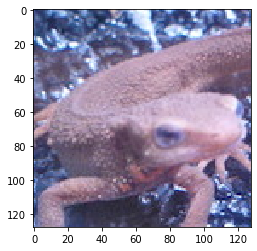

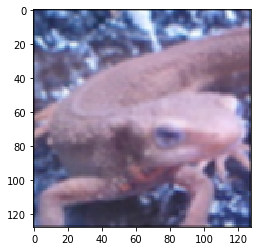

In [2]:
#11
img = cv2.imread("images/imori.jpg")
ave = lambda mat: np.mean(mat)
img2 = Filter(img, K_func=ave, k_size=3, pad_size=1)

plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(BGR2RGB(img2))

## Q.12. Motion Filter

### Detail: Implement the motion filter (3 x 3).

The motion filter is a filter that takes the average value in the diagonal direction and is defined by the following equation.

```bash
  1/3  0   0
[  0  1/3  0 ]
   0   0  1/3
```

|Input (imori.jpg)|Output (answer_12.jpg)|
|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_12.jpg)|

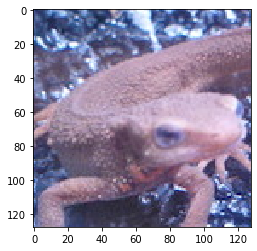

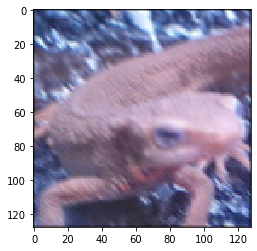

In [3]:
#12
img = cv2.imread("images/imori.jpg")

motion_kernel = np.array([[1/3,0,0],[0,1/3,0],[0,0,1/3]])
K_func = lambda mat: motion_kernel*mat


img2 = Filter(img, K_func=K_func, k_size=3, pad_size=1)

plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(BGR2RGB(img2))

## Q.13. Max-Min Filter

### Detail：Implement the Max-Min filter (3 x 3).

The Max-Min filter is a filter that outputs the difference between the maximum value and the minimum value of pixels in the filter, and is one of the filters for **edge detection** . Edge detection is to detect a line in an image, and an operation to extract information in such an image is called **feature extraction** . For edge detection, filtering is performed on grayscale images in many cases.

|Input (imori.jpg)|Output (answer_13.jpg)|
|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_13.jpg)|

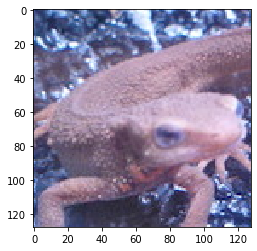

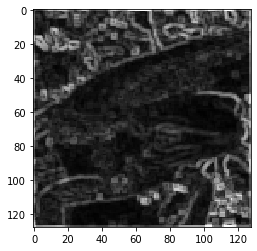

In [4]:
#13
img = cv2.imread("images/imori.jpg")
gray_img = get_luminance(img)
K_func = lambda mat: np.max(mat) - np.min(mat)

img2 = Filter(gray_img, K_func=K_func, k_size=3, pad_size=1)
plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(img2, cmap = 'gray')

## Q.14. Differential Filter

### Detail：Implement differential filter (3 x 3).

The differential filter is a filter that extracts the edge of the portion where the abrupt change in luminance occurs and takes the difference between the adjacent pixels.

```bash
(a)Vertical Direction      (b)Horizontal Direction
      0 -1  0                        0 0 0
K = [ 0  1  0 ]               K = [ -1 1 0 ]
      0  0  0                        0 0 0
```

|Input (imori.jpg)|Output・Vertical direction (answer_14_v.jpg)|Output・Horizontal direction (answer_14_h.jpg)|
|:---:|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_14_v.jpg)|![](images/answer_14_h.jpg)|

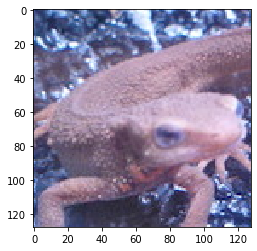

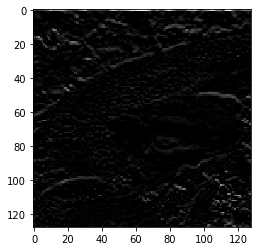

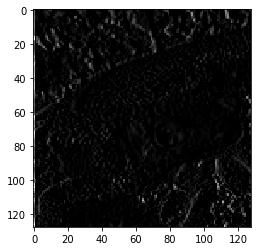

In [5]:
#14
img = cv2.imread("images/imori.jpg")
gray_img = get_luminance(img)
vdiff_kernel = np.array([[0,-1.,0],[0,1.,0],[0,0,0]])
hdiff_kernel = np.array([[0,0,0],[-1.,1.,0],[0,0,0]])
K_func = lambda kernel: lambda mat: kernel*mat
img2 = Filter(gray_img, K_func=K_func(vdiff_kernel), k_size=3, pad_size=1)
img3 = Filter(gray_img, K_func=K_func(hdiff_kernel), k_size=3, pad_size=1)

plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(img2, cmap="gray")
plt.figure()
plt.imshow(img3, cmap="gray")

## Q.15. Sobel Filter

### Detail: Implement the Sobel filter (3x3).

The Sobel filter (Sobel filter) is a filter that extracts only edges in a specific direction (vertical and horizontal), and is defined by the following equation.

```bash
(a)Horizontal Direction      (b)Vertical Direction
      1 0 -1                         1  2  1
K = [ 2 0 -2 ]                K = [  0  0  0 ]
      1 0 -1                        -1 -2 -1
```

|Input (imori.jpg)|Output・Vertical direction (answer_15_v.jpg)|Output・Horizontal direction (answer_15_h.jpg)|
|:---:|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_15_v.jpg)|![](images/answer_15_h.jpg)|

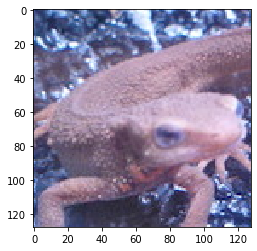

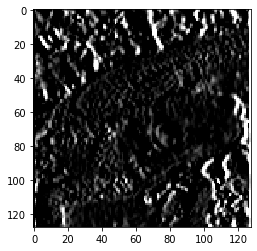

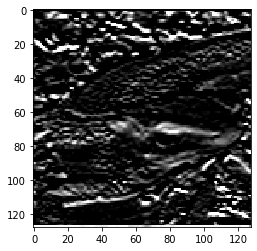

In [6]:
#15
img = cv2.imread("images/imori.jpg")
gray_img = get_luminance(img)
hsobel_kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
vsobel_kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
K_func = lambda kernel: lambda mat: kernel*mat
img2 = Filter(gray_img, K_func=K_func(hsobel_kernel), k_size=3, pad_size=1)
img3 = Filter(gray_img, K_func=K_func(vsobel_kernel), k_size=3, pad_size=1)

plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(img2, cmap="gray")
plt.figure()
plt.imshow(img3, cmap="gray")

## Q.16.  Prewitt Filter

### Detail: Implement the Prewitt filter (3x3).

The Prewitt filter is a type of edge extraction filter and is defined by the following equation.

```bash
(a)Vertical Direction      (b)Horizontal Direction
      -1 -1 -1                      -1 0 1
K = [  0  0  0 ]              K = [ -1 0 1 ]
       1  1  1                      -1 0 1
```

|Input (imori.jpg)|Output・Vertical Direction(answer_16_v.jpg)|Output・Horizontal Direction (answer_16_h.jpg)|
|:---:|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_16_v.jpg)|![](images/answer_16_h.jpg)|

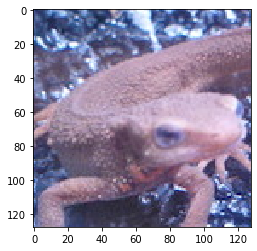

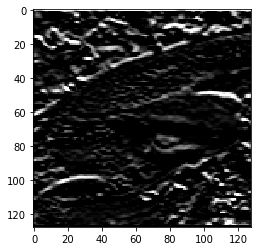

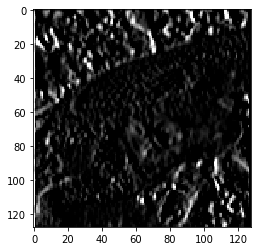

In [7]:
#16
img = cv2.imread("images/imori.jpg")
gray_img = get_luminance(img)
vprewitt_kernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
hprewitt_kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
K_func = lambda kernel: lambda mat: kernel*mat
img2 = Filter(gray_img, K_func=K_func(vprewitt_kernel), k_size=3, pad_size=1)
img3 = Filter(gray_img, K_func=K_func(hprewitt_kernel), k_size=3, pad_size=1)

plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(img2, cmap="gray")
plt.figure()
plt.imshow(img3, cmap="gray")

## Q.17. Laplacian Filter

### Detail：Implement the Laplacian filter.

The Laplacian (Laplacian) filter is a filter that performs edge detection by taking the second derivative of luminance.

Since the digital image is discrete data, the first-order derivatives in the x direction and the y direction are expressed by the following equations, respectively.

```bash
Ix(x,y) = (I(x+1, y) - I(x,y)) / ((x+1)-x) = I(x+1, y) - I(x,y)
Iy(x,y) = (I(x, y+1) - I(x,y)) / ((y+1)-y) = I(x, y+1) - I(x,y)
```

Further, the second derivative is expressed by the following equation.

```bash
Ixx(x,y) = (Ix(x,y) - Ix(x-1,y)) / ((x+1)-x) = Ix(x,y) - Ix(x-1,y)
         = (I(x+1, y) - I(x,y)) - (I(x, y) - I(x-1,y))
         = I(x+1,y) - 2 * I(x,y) + I(x-1,y)
Iyy(x,y) = ... = I(x,y+1) - 2 * I(x,y) + I(x,y-1)
```

From these, Laplacian is defined by the following equation.

```bash
D^2 I(x,y) = Ixx(x,y) + Iyy(x,y)
           = I(x-1,y) + I(x,y-1) - 4 * I(x,y) + I(x+1,y) + I(x,y+1)
```

When it is kernelized, it becomes as follows.

```bash
      0  1  0
K = [ 1 -4  1 ]
      0  1  0
```

|Input (imori.jpg)|Output(answer_17.jpg)|
|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_17.jpg)|

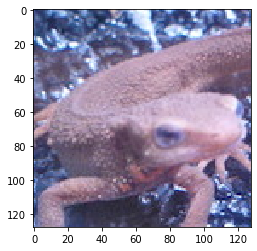

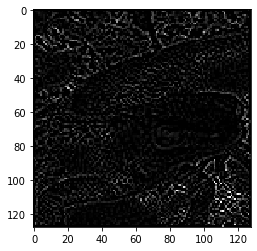

In [8]:
#17
img = cv2.imread("images/imori.jpg")
gray_img = get_luminance(img)
laplacian_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplacian = lambda mat: laplacian_kernel*mat
img2 = Filter(gray_img, K_func=laplacian, k_size=3, pad_size=1)

plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(img2, cmap="gray")

## Q.18. Emboss Filter

### Detail: Implement the Emboss filter.

The Emboss filter is a filter that embosses outline parts and is defined by the following equation.

```bash
      -2 -1  0
K = [ -1  1  1 ]
       0  1  2
```

|Input (imori.jpg)|Output(answer_18.jpg)|
|:---:|:---:|
|![](images/imori.jpg)|![](images/answer_18.jpg)|

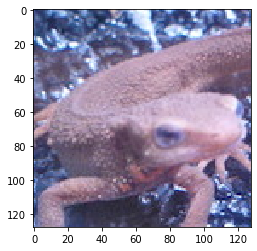

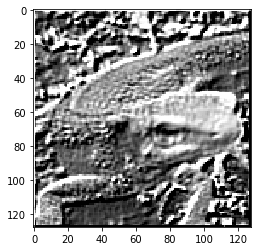

In [9]:
#18
img = cv2.imread("images/imori.jpg")
gray_img = get_luminance(img)
emboss_kernel = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
emboss = lambda mat: emboss_kernel*mat
img2 = Filter(gray_img, K_func=emboss, k_size=3, pad_size=1)

plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(img2, cmap="gray")

## Q.19. LoG Filter

### Detail: Implement the LoG filter (s = 3) and detect the edge of *imori_noise.jpg* .

The LoG filter is the Laplacian of Gaussian, which filters the image with the Gaussian filter and then takes out the outline with the Laplacian filter.

Since the Laplcian filter takes a second derivative, noise is suppressed in advance by a Gaussian filter in order to prevent noise from being emphasized.

The LoG filter is defined by the following equation.

```bash
LoG(x,y) = (x^2 + y^2 - s^2) / (2 * pi * s^6) * exp(-(x^2+y^2) / (2*s^2))
```

|Input (imori_noise.jpg)|Output (answer_19.jpg) |
|:---:|:---:|
|![](images/imori_noise.jpg)|![](images/answer_19.jpg)|


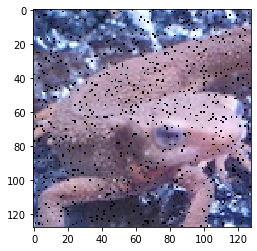

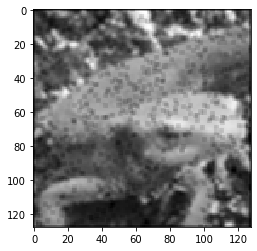

In [11]:
#19
img = cv2.imread("images/imori_noise.jpg")
gray_img = get_luminance(img)

log_kernel = lambda s: lambda x,y: (x**2 + y**2 - s**2)/(2*np.pi*s**6) * np.exp(-(x**2 + y**2) / (2*s**2))

def log(log_kernel, k_size=3):
    K = np.zeros((k_size,k_size))
    h = k_size//2
    for x in range(-h, k_size-h):
        for y in range(-h, k_size-h):
            K[y+h,x+h] = log_kernel(x,y)
    K /= K.sum()
    return lambda mat: K*mat

img2 = Filter(gray_img, K_func=log(log_kernel(3), k_size=3), k_size=3, pad_size=1)

plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.imshow(img2, cmap="gray")

## Q.20. Histogram Display

### Detail: Use matplotlib to display the histogram of *imori_dark.jpg* .

A histogram is a graph of the appearance frequency of pixels. In matplotlib, there is already a function called hist (), so use it.

|Input (imori_dark.jpg)|Output (answer_20.png) |
|:---:|:---:|
|![](images/imori_dark.jpg)|![](images/answer_20.png)|

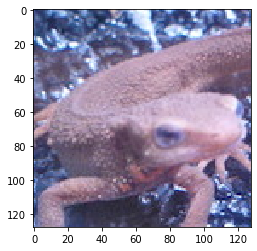

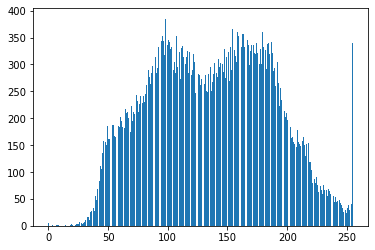

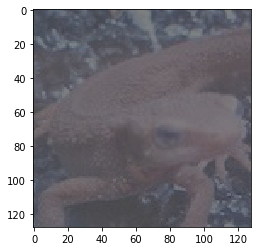

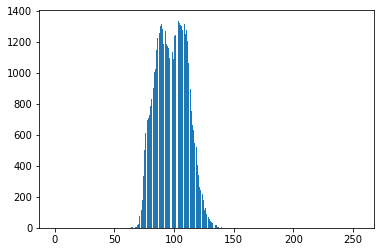

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("images/imori.jpg")
img2 = cv2.imread("images/imori_dark.jpg")

# Display histogram
plt.figure()
plt.imshow(BGR2RGB(img))
plt.figure()
plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()

# Display histogram
plt.figure()
plt.imshow(BGR2RGB(img2))
plt.figure()
plt.hist(img2.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()